In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 1 & tutorial name: lennard-jones-fluid
figures will be saved in /docs/sphinx/source/tutorials/figures/level1/lennard-jones-fluid/


In [4]:
log = lammps_logfile.File("log.lammps")
if os.path.exists("log.lammps"):
    timestep = 0.005
    Time_EM = log.get("Step", run_num = 0)*timestep
    PotEng_EM = log.get("PotEng", run_num = 0)
    KinEng_EM = log.get("KinEng", run_num = 0)
    Time_MD = log.get("Step", run_num = 1)*timestep
    PotEng_MD = log.get("PotEng", run_num = 1)
    KinEng_MD = log.get("KinEng", run_num = 1)
    if os.path.exists("data_plot/") is False:
        os.mkdir("data_plot/")
    np.savetxt("data_plot/EM.dat", np.vstack([Time_EM, PotEng_EM, KinEng_EM]).T)
    np.savetxt("data_plot/MD.dat", np.vstack([Time_MD, PotEng_MD, KinEng_MD]).T)
else:
    Time_EM, PotEng_EM, KinEng_EM = np.loadtxt("data_plot/EM.dat")
    Time_MD, PotEng_MD, KinEng_MD = np.loadtxt("data_plot/MD.dat")

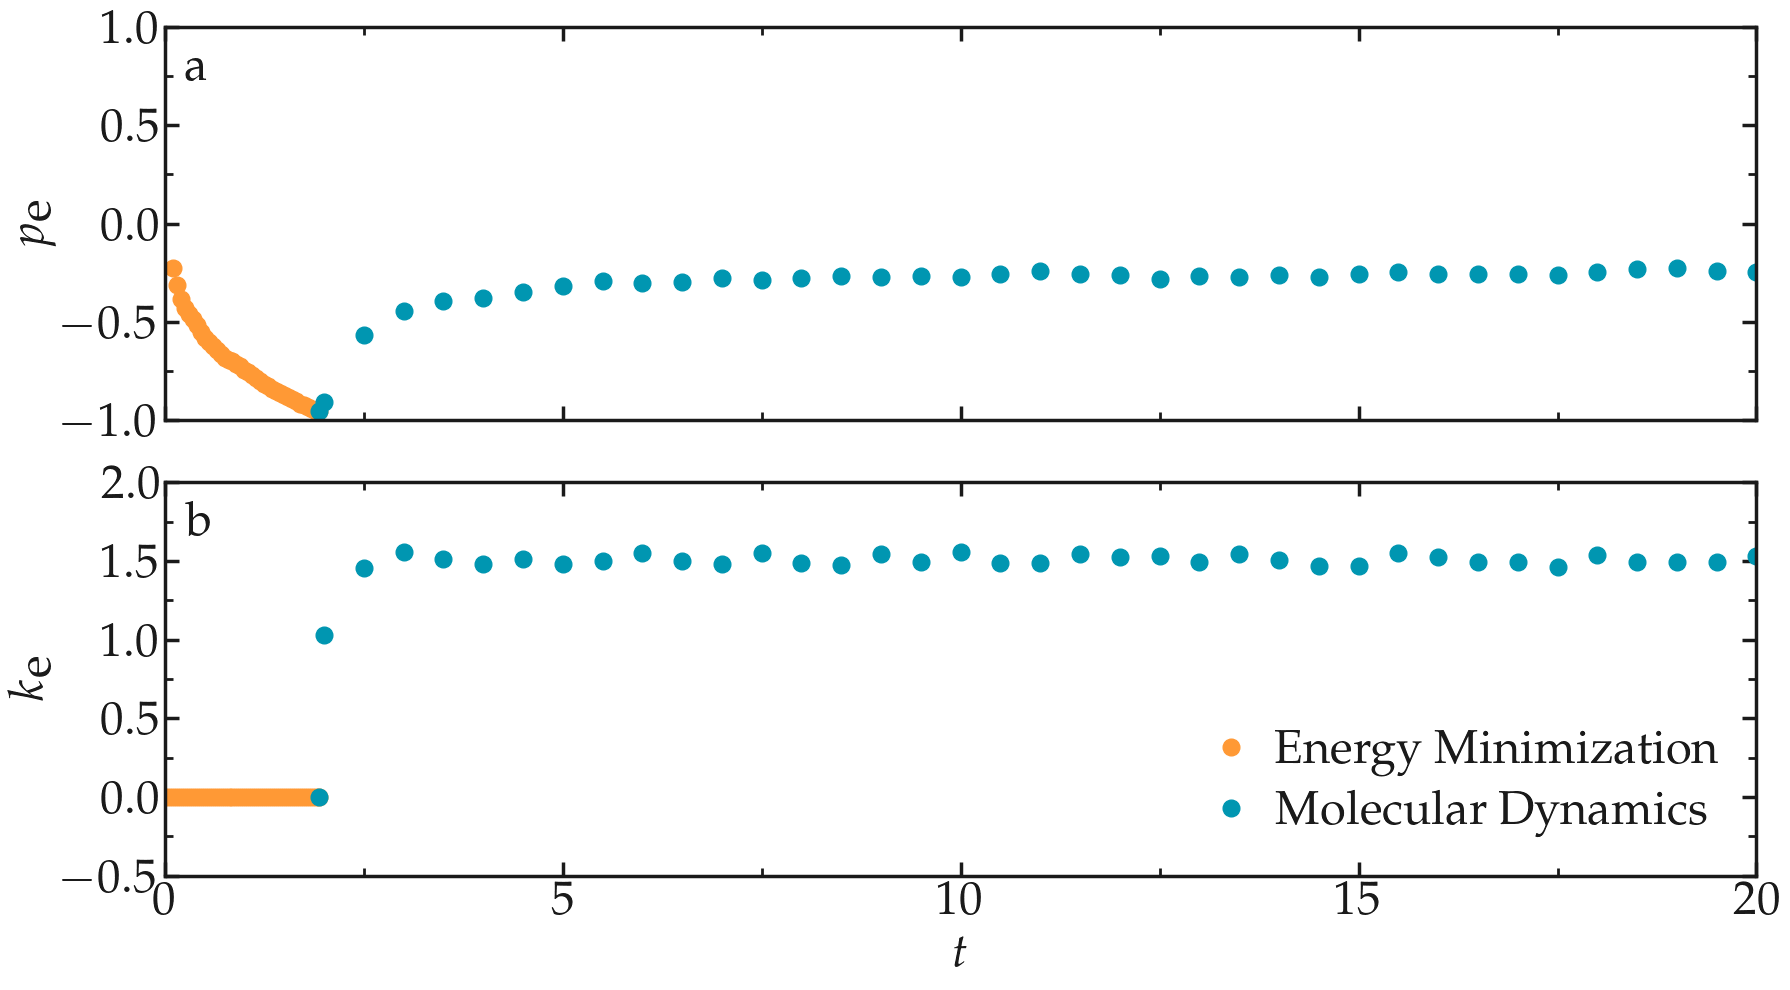

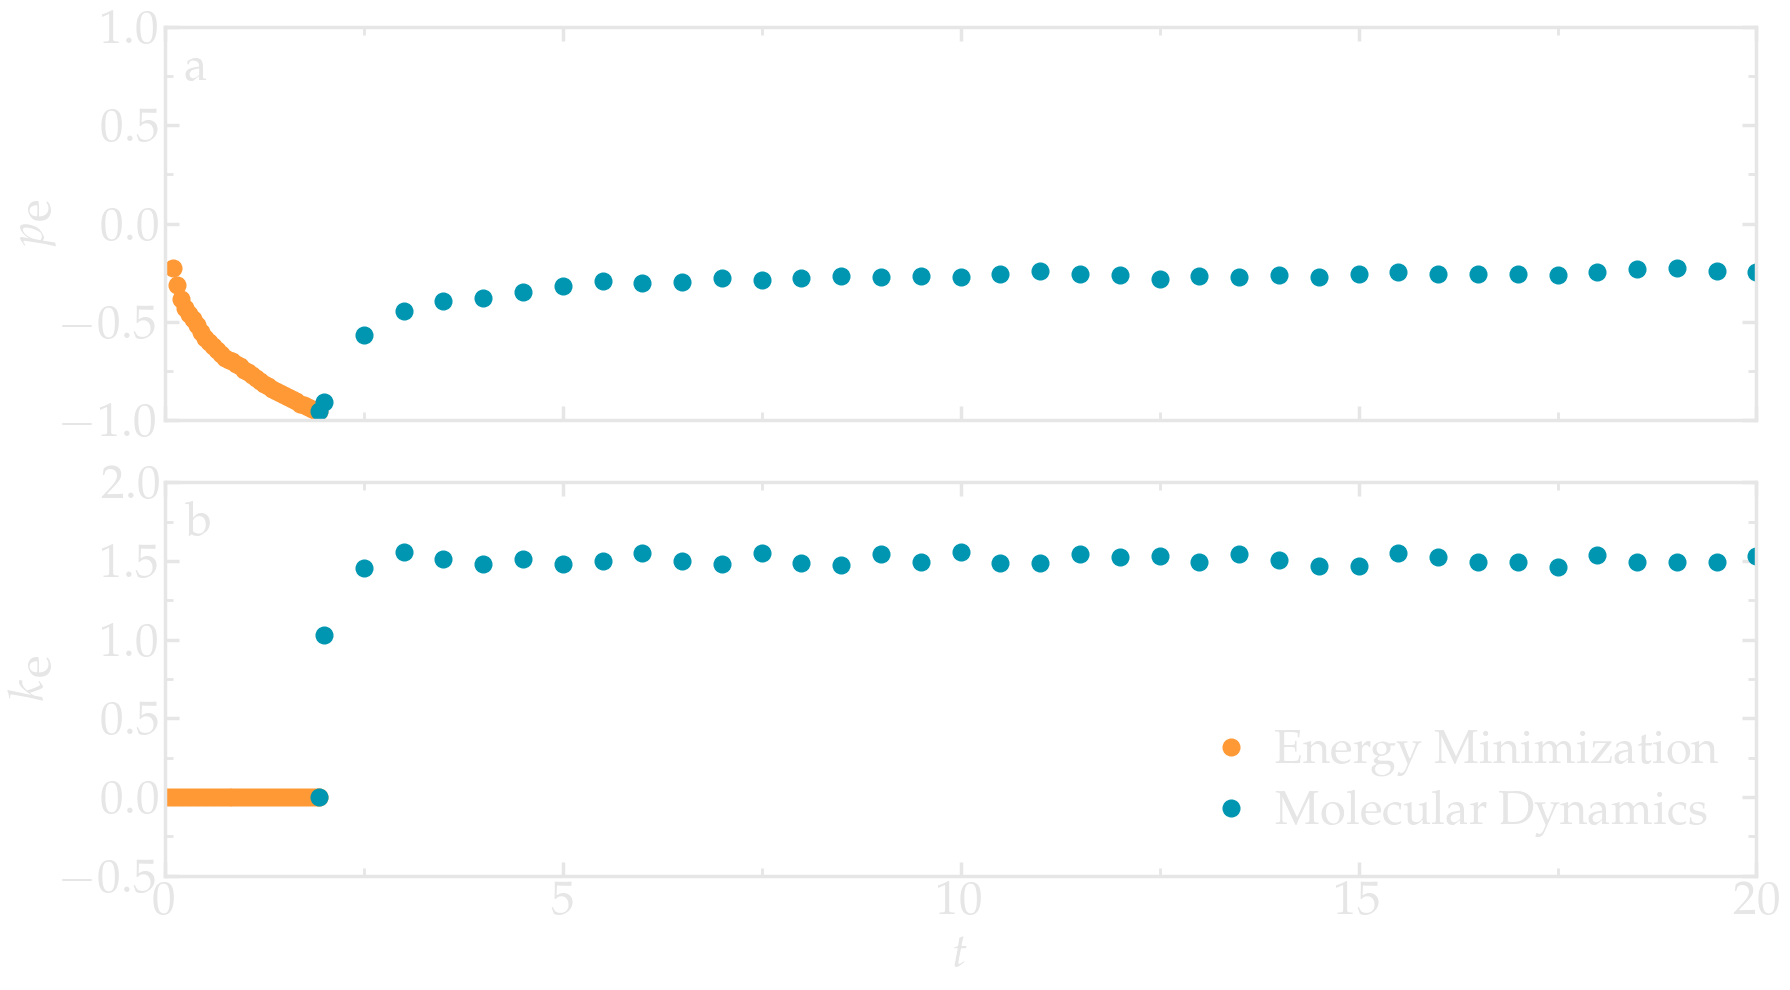

In [9]:
filename = "energy"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Time_EM, PotEng_EM, 'o', color=colors["myorange"], markersize = 12) # linewidth=3)
    ax[-1].plot(Time_MD, PotEng_MD, 'o', color=colors["myblue"], markersize = 12)
    complete_panel(ax[-1], None, r'$p_\textrm{e}$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20),
                   y_ticks=np.arange(-1, 1.5, 0.5), y_boundaries=(-1, 1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Time_EM, KinEng_EM, 'o', color=colors["myorange"], markersize = 12, label=r"Energy Minimization")
    ax[-1].plot(Time_MD, KinEng_MD, 'o', color=colors["myblue"], markersize = 12, label=r"Molecular Dynamics")
    complete_panel(ax[-1], r'$t$', r'$k_\textrm{e}$', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20),
                   y_ticks=np.arange(-0.5, 2.5, 0.5), y_boundaries=(-0.5, 2))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)